<a href="https://colab.research.google.com/github/SiracencoSerghei/DataScienceHW/blob/main/example_kaggle/les_9/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Завантаження CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


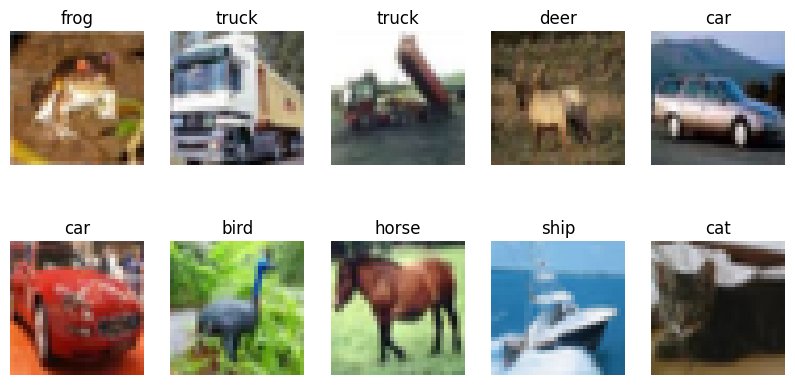

In [3]:
# Нормалізація (значення пікселів у [0,1])
x_train, x_test = x_train / 255.0, x_test / 255.0

# Назви класів
class_names = [
    "plane", "car", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

# Візуалізація кількох зображень
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()

In [4]:
# Створення моделі
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),  # Регуляризація
    layers.Dense(10, activation="softmax")  # 10 класів
])

# Компіліруємо модель
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Навчання моделі
history = model.fit(x_train, y_train, epochs=10,
                    batch_size=64, validation_data=(x_test, y_test))

# Оцінка точності
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nТочність на тестових даних: {test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 57ms/step - accuracy: 0.2455 - loss: 1.9911 - val_accuracy: 0.4825 - val_loss: 1.4238
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.4626 - loss: 1.4818 - val_accuracy: 0.5276 - val_loss: 1.2912
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 51ms/step - accuracy: 0.5236 - loss: 1.3302 - val_accuracy: 0.5967 - val_loss: 1.1339
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 37s 47ms/step - accuracy: 0.5701 - loss: 1.2215 - val_accuracy: 0.6098 - val_loss: 1.1066
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.6018 - loss: 1.1334 - val_accuracy: 0.6247 - val_loss: 1.0548
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.6198 - loss: 1.0869 - val_accuracy: 0.6611 - val_loss: 0.9719
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.6448 - loss: 1.0180 - val_accuracy: 0.6556 - val_loss: 0.9856
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.6624 - loss: 0.9776 - 

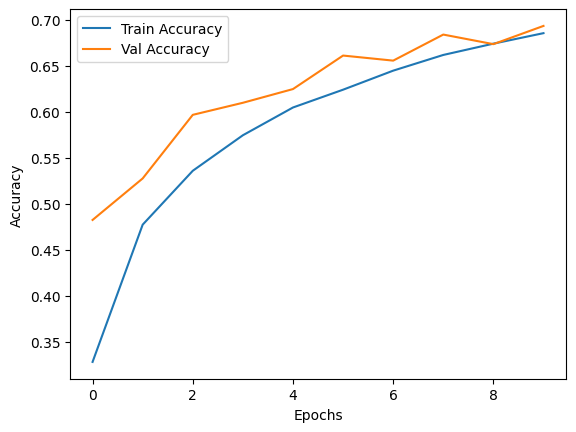

In [5]:
# Візуалізація процесу навчання
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()